In [3]:
import TensorFrost as tf
import numpy as np
import matplotlib.pyplot as plt
import time

tf.initialize(tf.opengl)

S = 2048

def color_func(x, o):
	return 0.5 + 0.5*tf.cos(3.0 + x*0.15 + o);

def mandelbrot():
    canvas = tf.zeros([S, S, 3], tf.float32)
    i, j = tf.indices([S, S])
    y, x = tf.float(i), tf.float(j)

    z_re = tf.zeros([S, S], tf.float32)
    z_im = tf.zeros([S, S], tf.float32)
    l = tf.zeros([S, S], tf.float32)
    c_re = x * (3.0 / S) - 2.0
    c_im = y * (3.0 / S) - 1.5
    def loop_body(k):
        z_re_new = z_re*z_re - z_im*z_im + c_re
        z_im_new = 2.0*z_re*z_im + c_im
        z_re.set(z_re_new)
        z_im.set(z_im_new)
        tf.if_cond((z_re*z_re + z_im*z_im) > 256.0, lambda: tf.break_loop())
        l.set(l + 1.0)
         
    tf.loop(loop_body, 0, 128, 1)

    sl = tf.select(l < 128.0, l - tf.log2(tf.log2(z_re*z_re + z_im*z_im)) + 4.0, 0.0)

    canvas[i, j, 0] = color_func(sl, 0.0)
    canvas[i, j, 1] = color_func(sl, 0.6)
    canvas[i, j, 2] = color_func(sl, 1.0)

    return [canvas]

mand = tf.compile(mandelbrot)
res = mand()
resnp = res[0].numpy
print(resnp.shape)

mandelbrot:
  Kernel count: 2
  Intermediate buffers: 0
  Host readbacks: 0
  Host writes: 0
  Lines of generated code: 361
  IR Compile time: 1.064400 ms
  Compiler time: 1391.370728 ms

(2048, 2048, 3)


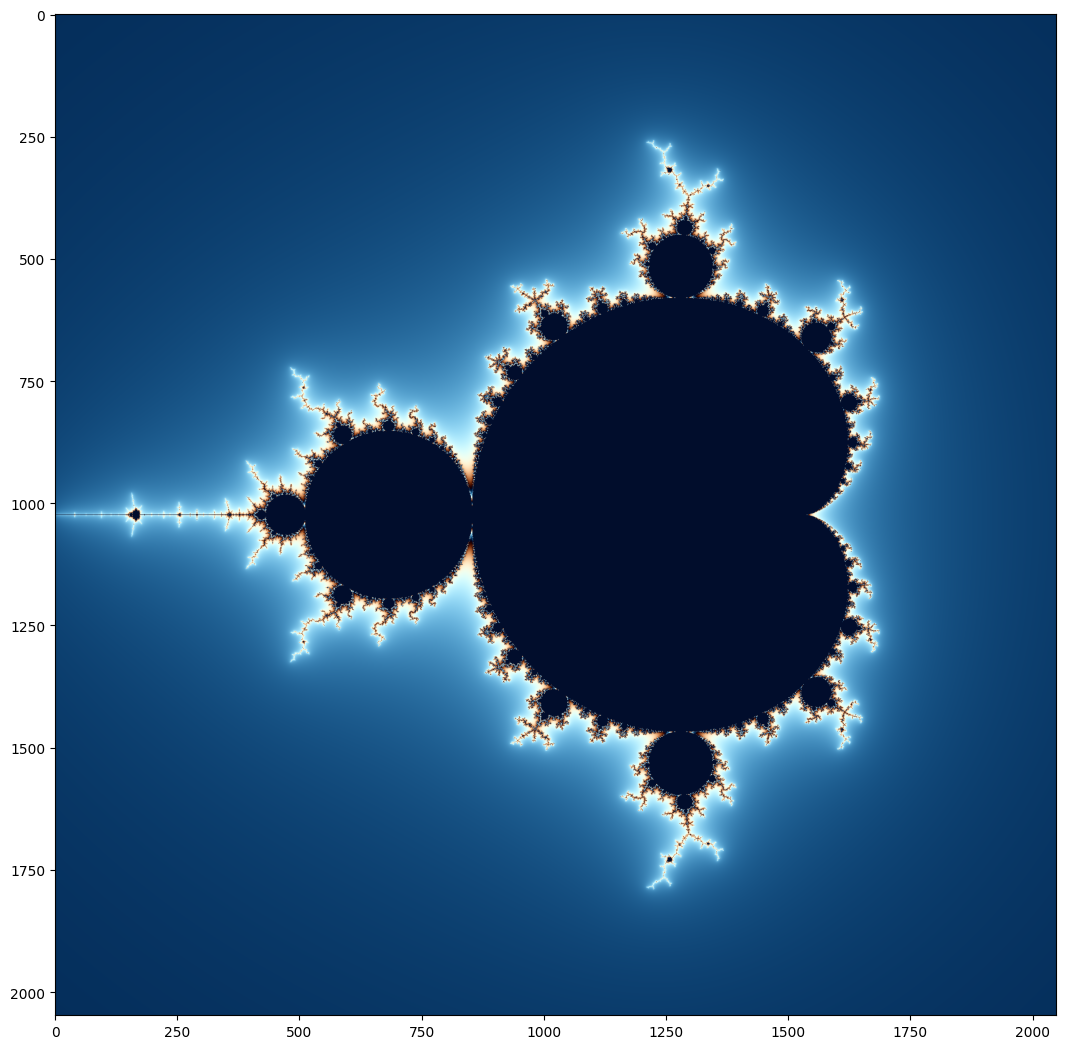

In [4]:
# plot the result
plt.figure(figsize=(13,13))
plt.imshow(resnp)
plt.show()